In [3]:
from manim import *
config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

In [44]:
def N(x,y):
    f= 3*np.exp(-x**2) * np.exp(-y**2)
    return np.array([x,y,f])

In [7]:
def f3(x,y):
    # f= np.sin(x) * np.sin(y)
    # f= np.log(x**2 + y**2)
    # f= 3/(1+x**2 + y**2)
    f= np.cos(x) + np.sin(y) 
    return np.array([x,y,f])

In [55]:
def grad(x,y):
    dx = -np.sin(x)
    dy = np.cos(y)
    return np.array([dx,dy, f3(x,y)[2]])

In [ ]:
%%manim $_RV

class Example(ThreeDScene):
    def construct(self):
        points=PGroup()
        ax=ThreeDAxes(x_range=[-5, 5], y_range=[-5, 5], z_range=[-1, 1], axis_config={"color": WHITE})
        self.set_camera_orientation(phi=0*DEGREES, theta=0*DEGREES)
        for j in np.linspace(-5, 5, 70):
            for i in np.linspace(-2.5, 2.5, 70):
                point = Point(f3(i,j), color=WHITE)
                point.set_color(BLUE)
                points.add(point)

        points.shift([0,0,-1])
        
     
        self.play(FadeIn(points), run_time=3)
        self.move_camera(phi=45 * DEGREES, theta=-45 * DEGREES,run_time=3)
        self.wait(2)
      
        max_p= (PI/4,PI/4)

        
        dot= Dot3D(f3(*max_p), color=RED)
        
        t= Arrow3D(start=f3(*max_p), end=f3(*max_p)+0.5*grad(*max_p), color=WHITE)
        b= t.copy().rotate(PI/2,about_point=dot.get_center(), axis=RIGHT)
        n= t.copy().rotate(PI/2,about_point=dot.get_center(), axis=OUT)
        vg= VGroup(t,n,b,dot)
        
  
        self.play(LaggedStartMap(Create,vg, run_time=1))
        self.wait(2)

       
       

        


Manim Community v0.18.1

Manim Community v0.18.1

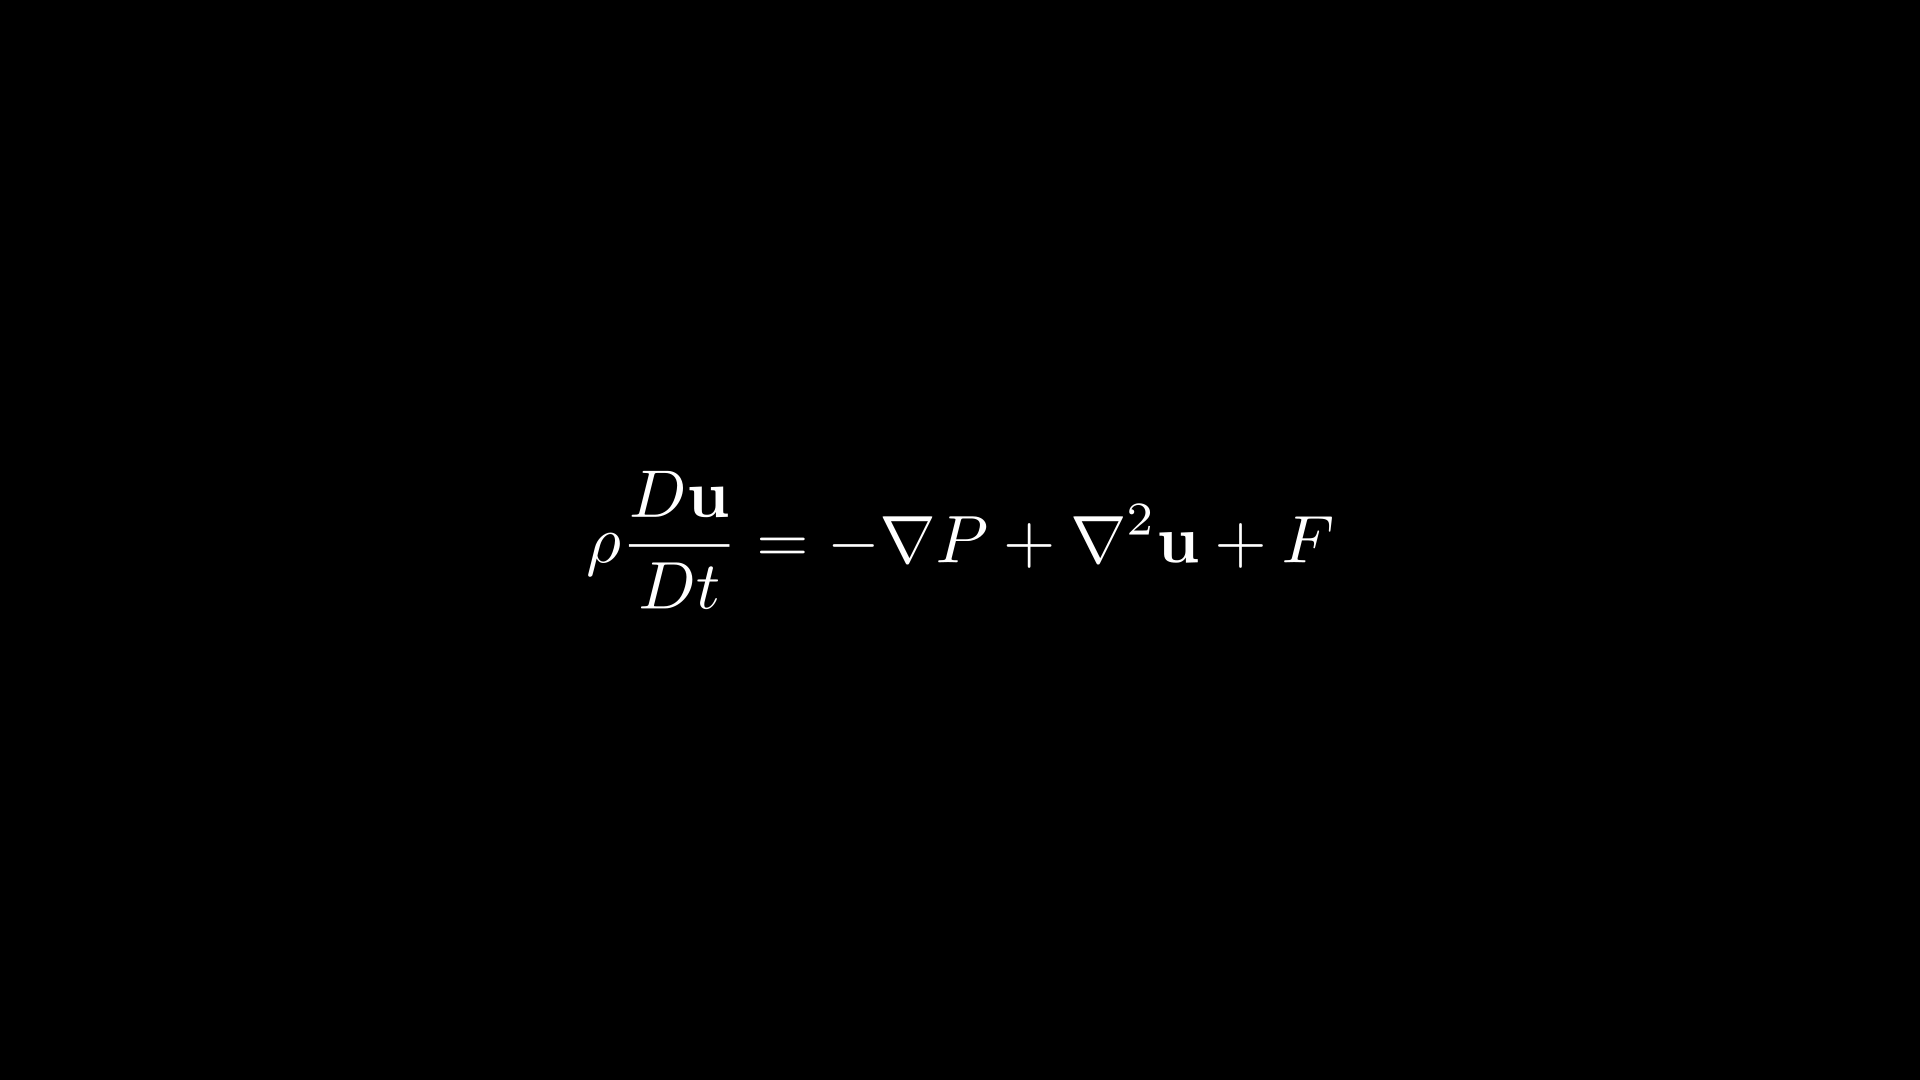

In [5]:
%%manim $_RI
class Example(Scene):
    def construct(self):
        text=MathTex(r'\rho \frac{D \textbf{u}}{Dt} = - \nabla P  + \nabla^2 \textbf{u} + F')
        self.add(text)

In [2]:
%%manim $_RV
class Example(Scene):
    def construct(self):
        func = lambda p: np.array([0,0,0] if p[0] ==0  and p[1] ==0 else [p[1]/(p[0]**2 + p[1]**2+0.1), -p[0]/(p[1]**2 +p[0]**2+0.1),0])
        vector_field= ArrowVectorField(func).fade(0.5)
        
        self.add(vector_field)
            
   
        stream_lines = StreamLines(func, stroke_width=2)
     
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=0.75)
        self.wait(5)

UsageError: Cell magic `%%manim` not found.


In [312]:
%%manim $_RV
class Example(Scene):
    def construct(self):
        self.add(NumberPlane().fade(0.5))

        func = lambda p: np.array([p[1]/(p[0]**2 + p[1]**2+0.1), -p[0]/(p[1]**2 +p[0]**2+0.1),0])
        
            
        vector_field= ArrowVectorField(func)
        VectorField.start_submobject_movement
        points= [[0,.5,0],[.5,0,0],[0,-.5,0],[-.5,0,0],[.5,.5,0],[-.5,-.5,0],[.5,-.5,0],[-.5,.5,0]]
        dots=VGroup(*[Dot(point=point, color=RED).scale(0.5) for point in points])

        self.add(vector_field)
        # vg= VGroup(*[vector_field.get_vector(point) for point in points])

        
 
        # self.add(vg)
        # self.add(dots)
        # for v in vg:
        #     v.add_updater(vector_field.get_nudge_updater())
        #     v.add_updater(lambda m: m.become(vector_field.get_vector(v.get_start())))
        # self.wait(5)
        coord=Point([0,0,0]).fade(1)

        vector= vector_field.get_vector(coord.get_center())
        vector.add_updater(lambda v: v.become(vector_field.get_vector(coord.get_center())))
        self.add(vector)
        self.play(
            coord.animate.shift(LEFT*4),
            run_time=3
        )
        self.play(
            Rotating(coord, radians=-PI, about_point=ORIGIN),
            run_time=5)
        
    

        
        


Manim Community v0.18.1

In [51]:
def div_field(p):
    epsilon=1
    x , y , z =  p
    # Source-like terms
    fx1 = (x - 2) / ((x - 2)**2 + (y - 2)**2 + epsilon)
    fy1 = (y - 2) / ((x - 2)**2 + (y - 2)**2 + epsilon)

    fx2 = (x + 2) / ((x + 2)**2 + (y + 2)**2 + epsilon)
    fy2 = (y + 2) / ((x + 2)**2 + (y + 2)**2 + epsilon)

    # Sink-like terms
    fx3 = (x - 2) / ((x - 2)**2 + (y + 2)**2 + epsilon)
    fy3 = (y + 2) / ((x - 2)**2 + (y + 2)**2 + epsilon)

    fx4 = (x + 2) / ((x + 2)**2 + (y - 2)**2 + epsilon)
    fy4 = (y - 2) / ((x + 2)**2 + (y - 2)**2 + epsilon)

    # Net vector
    fx = fx1 + fx2 - fx3 - fx4
    fy = fy1 + fy2 - fy3 - fy4

    return np.array([fx, fy,0])

In [50]:
# p is the divergence point
def pointers(p, n=5, radius=0.5):
    terminal_point = p
    vectors=VGroup()
    for i in range(n):
            angle = 2 * PI * i / n
            origin = terminal_point + radius * np.array([np.cos(angle), np.sin(angle), 0])
            new_terminal = terminal_point + 1.2*np.array([np.cos(angle), np.sin(angle), 0])
            vector = Arrow(start=origin, end=new_terminal , buff=0, color=BLUE)
            vector.rotate(PI)
            vectors.add(vector)
    return vectors


Manim Community v0.18.1

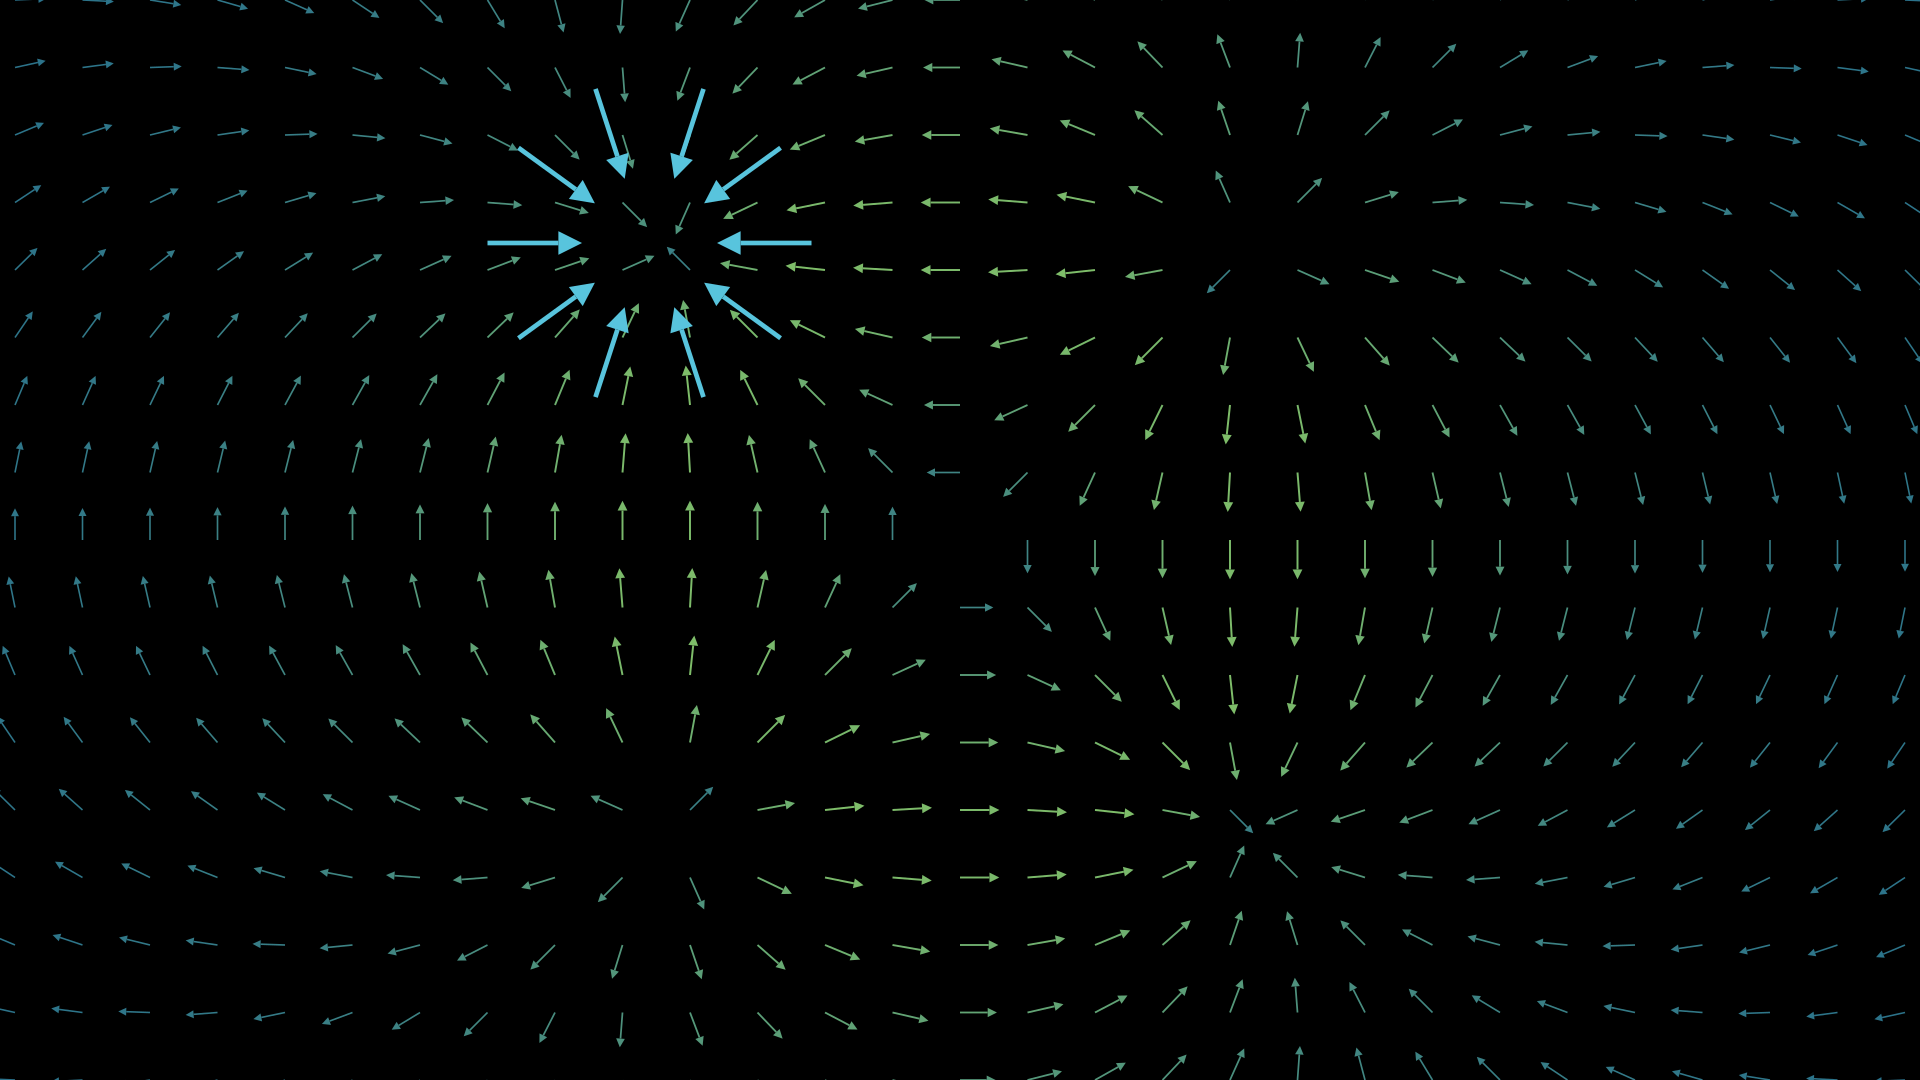

In [ ]:
%%manim $_RI
class Example(Scene):
    def construct(self):   
        st=StreamLines(div_field, stroke_width=2,x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        vf= ArrowVectorField(div_field, x_range=[-10, 10, 0.5], y_range=[-6, 6, 0.5])
        self.add(vf)

        vs= pointers([-2.3,2.2,0], n=10, radius=0.5)
        self.add(vs)
        
        # st.start_animation(warm_up=False, flow_speed=1)
        # self.wait(5)
       


Manim Community v0.18.1

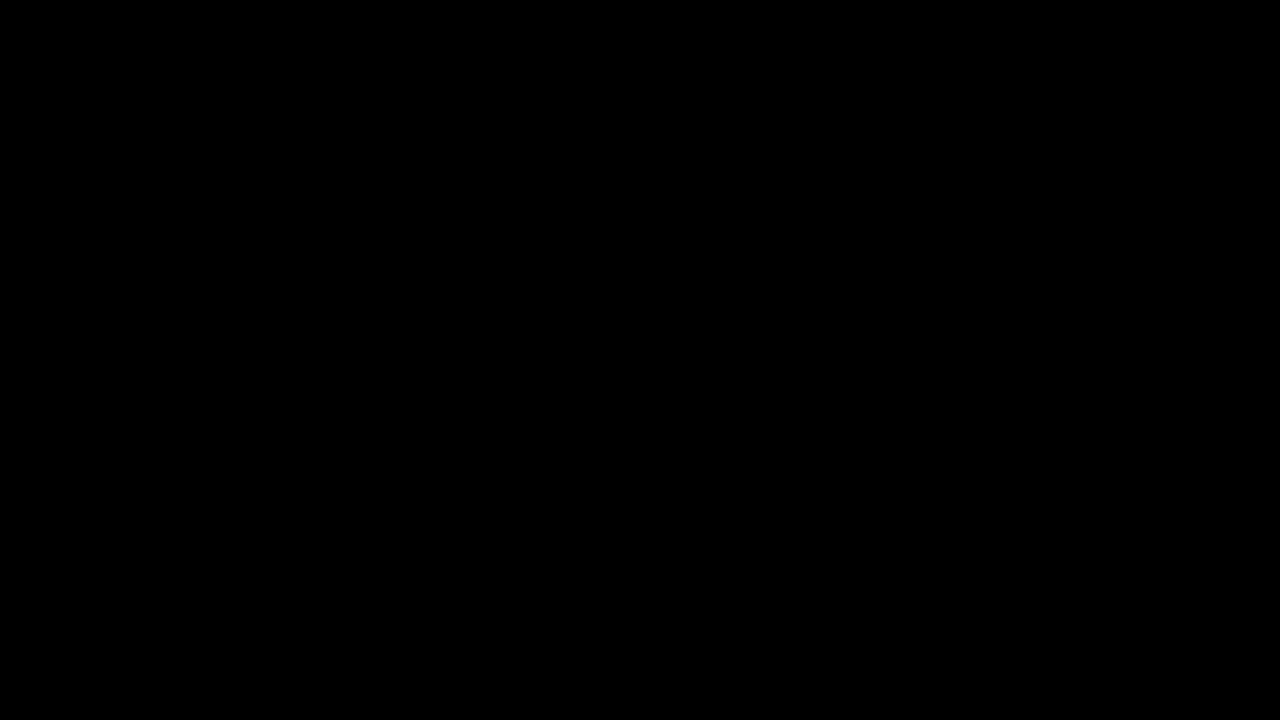

In [4]:
%%manim $_RV

class Example(Scene):
    def construct(self):
        point = Circle(radius=0.3, color=RED,fill_opacity=1).scale(2)
        line= Line(start=2*LEFT + point.get_bottom(), end=2*RIGHT + point.get_bottom(), color=BLUE)
        f1 = Arrow(start=2*DOWN , end=point.get_center(), max_tip_length_to_length_ratio=0.2 , buff=0).rotate(PI)
        f2 = Arrow(start=2*RIGHT , end=point.get_center(), max_tip_length_to_length_ratio=0.2 , buff=0).rotate(PI)
       

        

       

In [308]:
%%manim $_RV
class Example(Scene):
    def construct(self):
        figure = Circle(color=RED).scale(2)
        dot = Dot()
        
        vector = self.get_tangent_vector(0,figure,scale=2)
        vector2 = self.get_pointout_vector(0,figure,scale=2)
        dot.add_updater(lambda m: m.move_to(vector.get_start()))

        self.play(Create(figure), GrowArrow(vector),GrowFromCenter(dot))

        # vector.add_updater(
        #     lambda m: m.become(
        #             self.get_tangent_vector(alpha.get_value()%1,figure,scale=2)
        #         )
        #     )

        def tan(mob, alpha):
            mob.become(
                    self.get_tangent_vector(alpha,figure,scale=2))


        # vector2.add_updater(
        #     lambda m: m.become(
        #             self.get_pointout_vector(alpha.get_value()%1,figure,scale=2)
        #         )
        #     )

        self.play(UpdateFromAlphaFunc(vector, tan), run_time=8, rate_func=linear)
        self.wait()

    def get_tangent_vector(self, proportion, curve, scale=1):
        coord_i = curve.point_from_proportion(proportion)
        coord_f = curve.point_from_proportion(proportion + 0.001 if proportion < 1 else 1) 
        reference_line = Line(coord_i,coord_f)
        unit_vector = reference_line.get_unit_vector() * scale
        vector = Arrow(coord_i, coord_i + unit_vector, buff=0)
        return vector

    def get_pointout_vector(self, proportion, curve, dx=0.001, scale=1):
        coord_i = curve.point_from_proportion(proportion)
        coord_f = curve.point_from_proportion(proportion + dx)
        reference_line = Line(coord_i,coord_f)
        unit_vector = reference_line.get_unit_vector() * scale
        vector = Arrow(coord_i, coord_i + unit_vector, buff=0)
        vector.rotate(-PI/2, about_point=vector.get_start())
        return vector

Manim Community v0.18.1

In [77]:
%%manim $_RV

# try using alpha tracker to move the point or valuetrakcer ( set two points in the graph and the progressing of the point)
class Example(ThreeDScene):
     def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        # Axes
        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        func = lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v))
        # df= lambda u, v: axes.c2p(u, v, -2*np.sin(u)*np.sin(v)+2*np.cos(u)*np.cos(v))

        surface = Surface(
            func,
            resolution=30,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
        )
        surface.fade(0.5)
       
        
        x0, y0 = 0.5, 0

        # Gradient function (partial derivatives)
        def gradient(x, y):
            dx = 2*np.cos(x) * np.cos(y)
            dy = -2*np.sin(x) * np.sin(y)
            return np.array([dx, dy])

        # Dot that will follow the path
        dot = Dot3D(func(x0, y0), color=RED)

        # Path storage
        

        # Move the dot along the negative gradient
       
        

        def upd(mob, alpha):
            x,y,z = mob.get_center()
            grad = gradient(x, y)
            x -= alpha * grad[0]
            y -= alpha * grad[1]
            z= func(x, y)[2]
            mob.become(Dot3D(np.array([x, y, z])))


     
 
        self.add(axes, surface, dot)

        self.play(UpdateFromAlphaFunc(dot, upd), run_time=5, rate_func=linear)
        
        self.wait()
        
       
       
        

    
        

      

 
        


Manim Community v0.18.1

In [42]:
%%manim $_RV

class Example(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES, theta=-120*DEGREES)

        # Axes
        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        # Surface function
        func = lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v))

        surface = Surface(
            func,
            resolution=30,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
        ).fade(0.5)

        # Gradient in (u, v) space
        def gradient(u, v):
            dx = 2 * np.cos(u) * np.cos(v)
            dy = -2 * np.sin(u) * np.sin(v)
            return np.array([dx, dy])

        # Initial position in (u, v)
        u_val = ValueTracker(0.5)
        v_val = ValueTracker(0)
        
        pressure = MathTex(r' - \nabla P ')
        pressure.scale(2).to_corner(UL)
        self.add_fixed_in_frame_mobjects(pressure)
        # Dot on the surface
        dot = always_redraw(lambda: Dot3D(func(u_val.get_value(), v_val.get_value()), color=RED))

        
        arrow= always_redraw( lambda: Arrow(start=dot.get_center(), end=dot.get_center()-[1,1,0], color=RED))

        # Update function to simulate gradient descent in (u, v) space
        def update_uv(mob, dt):
            u = u_val.get_value()
            v = v_val.get_value()
            grad = gradient(u, v)
            step_size = 0.1 * dt  # adjust for smoothness
            u_val.set_value(u - step_size * grad[0])
            v_val.set_value(v - step_size * grad[1])


        dot.add_updater(update_uv)


        self.add(axes, surface, dot, arrow)

        self.wait(10)
        dot.clear_updaters()

        self.wait()


Manim Community v0.18.1